#Cifar100_Image_Classification

In [1]:
# import relevant modules
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
#Spilit Data into Training and Test 
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

#Feature Enggineering

In [0]:
x_train=x_train/255
x_test=x_test/255

In [6]:

x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [7]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

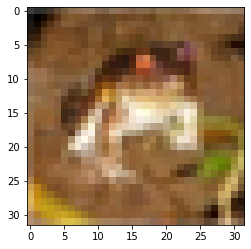

In [8]:
#For 3D and Colored Image
plt.imshow(x_train[0])

#Create Artificial Neural Network

In [0]:
# import Relevant modules

import keras
from keras.models import Sequential
from keras.layers import Flatten,Dense,Activation,LeakyReLU
from keras.layers import Dropout

In [0]:
#Initialize ANN
classifier = Sequential()


classifier.add(Flatten(input_shape=[32, 32, 3]))

# adding Dropout layer

#classifier.add(Dropout(0.3))  # Ratio of drop - out between 0 to 1
# second Hidden Layer:

classifier.add(Dense(200 ,activation = "relu",))
 
# Adding second Drop - out layer :
#classifier.add(Dropout(0.3))


# Output Layer : 
classifier.add(Dense(100,activation = 'softmax'))

In [0]:
classifier.compile(loss = "sparse_categorical_crossentropy",
                  optimizer= "adam",
                  metrics= ["accuracy"])

In [12]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
Total params: 634,700
Trainable params: 634,700
Non-trainable params: 0
_________________________________________________________________


In [14]:

#Fitting the ANN to Training set
classifier.fit(x_train,y_train,epochs=10)

Epoch 1/10
50000/50000 [==============================] - 17s 341us/step - loss: 1.6477 - accuracy: 0.4108
Epoch 2/10
50000/50000 [==============================] - 17s 347us/step - loss: 1.6041 - accuracy: 0.4324
Epoch 3/10
50000/50000 [==============================] - 17s 345us/step - loss: 1.5741 - accuracy: 0.4415
Epoch 4/10
50000/50000 [==============================] - 17s 343us/step - loss: 1.5441 - accuracy: 0.4526
Epoch 5/10
50000/50000 [==============================] - 17s 344us/step - loss: 1.5290 - accuracy: 0.4572
Epoch 6/10
50000/50000 [==============================] - 17s 344us/step - loss: 1.5062 - accuracy: 0.4672
Epoch 7/10
50000/50000 [==============================] - 18s 352us/step - loss: 1.4951 - accuracy: 0.4704
Epoch 8/10
50000/50000 [==============================] - 17s 347us/step - loss: 1.4827 - accuracy: 0.4750
Epoch 9/10
50000/50000 [==============================] - 17s 342us/step - loss: 1.4711 - accuracy: 0.4755
Epoch 10/10
50000/50000 [============

In [15]:
yp=classifier.predict(x_test)
yp

array([[6.9989130e-02, 4.3048081e-03, 9.8420106e-02, ..., 2.5510218e-21,
        1.7501417e-22, 4.7909929e-24],
       [8.1173599e-02, 1.9517583e-01, 3.0678888e-03, ..., 2.1709690e-20,
        1.7992884e-20, 3.5116858e-20],
       [1.8903390e-01, 1.3032117e-01, 7.8429480e-04, ..., 1.6654292e-21,
        5.4562735e-22, 2.4564019e-21],
       ...,
       [9.4709633e-04, 1.0287106e-04, 7.4297853e-02, ..., 4.5736067e-19,
        6.8374710e-17, 5.4186117e-17],
       [1.6088136e-02, 2.0870238e-03, 1.2910974e-01, ..., 8.0931916e-23,
        1.2768334e-20, 7.9492419e-20],
       [3.2217190e-02, 1.1222115e-02, 4.1196190e-02, ..., 4.1119861e-23,
        6.4758519e-23, 1.9792706e-22]], dtype=float32)

In [17]:
classifier.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 79us/step


[1.4904640768051147, 0.4693000018596649]

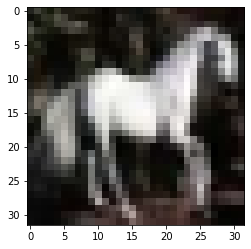

In [22]:
plt.imshow(x_test[13])

In [23]:
import numpy as np
np.argmax(yp[13])

0

In [0]:
class_label=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [25]:
class_label[np.argmax(yp[13])]

'airplane'